<a href="https://colab.research.google.com/github/nfilipas/handson-ml3/blob/main/exercises/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt

import numpy as np

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "sepal length (cm)"]].values
y = iris.target == 0

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

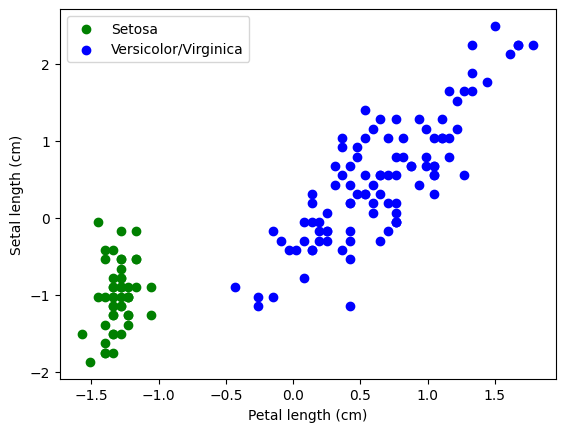

In [ ]:
plt.scatter(X_scaled[y, 0], X_scaled[y, 1], label="Setosa", color="g")
plt.scatter(X_scaled[~y, 0], X_scaled[~y, 1], label="Versicolor/Virginica", color="b")
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Setal length (cm)")
plt.show()

In [ ]:
linear_svm_clf = LinearSVC(loss="hinge", random_state=42)
linear_svm_clf.fit(X_scaled, y)
w = linear_svm_clf.coef_[0]
b = linear_svm_clf.intercept_[0]
print(f"w = {w}, b = {b}")

w = [-2.01860782  0.23655642], b = -1.1482127357742364


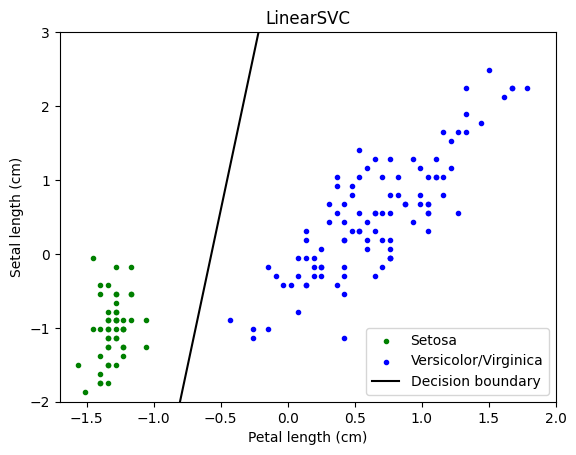

In [ ]:
x = np.array([-1.7, 2])
plt.scatter(X_scaled[y, 0], X_scaled[y, 1], label="Setosa", color="g", marker='.')
plt.scatter(X_scaled[~y, 0], X_scaled[~y, 1], label="Versicolor/Virginica", color="b", marker='.')
plt.plot(x, -(w[0] * x + b)/w[1], label="Decision boundary", color="black")
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Setal length (cm)")
plt.title("LinearSVC")
plt.xlim([-1.7, 2])
plt.ylim([-2, 3])
plt.show()

In [ ]:
sgd_clf = SGDClassifier(loss="epsilon_insensitive", alpha=0.001, epsilon=0.4, random_state=42)
sgd_clf.fit(X_scaled, y)
w = sgd_clf.coef_[0]
b = sgd_clf.intercept_[0]
print(f"w = {w}, b = {b}")

w = [-1.22129244  0.24256333], b = -0.6377251557854466


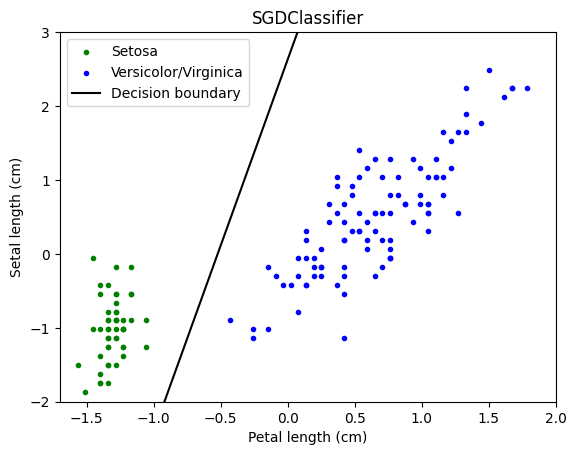

In [ ]:
x = np.array([-1.7, 2])
plt.scatter(X_scaled[y, 0], X_scaled[y, 1], label="Setosa", color="g", marker='.')
plt.scatter(X_scaled[~y, 0], X_scaled[~y, 1], label="Versicolor/Virginica", color="b", marker='.')
plt.plot(x, -(w[0] * x + b)/w[1], label="Decision boundary", color="black")
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Setal length (cm)")
plt.title("SGDClassifier")
plt.xlim([-1.7, 2])
plt.ylim([-2, 3])
plt.show()

In [ ]:
svc_clf = SVC(kernel="linear", tol=1e-4, random_state=42)
svc_clf.fit(X_scaled, y)
w = svc_clf.coef_[0]
b = svc_clf.intercept_[0]
print(f"w = {w}, b = {b}")

w = [-2.19924341e+00  4.33435001e-05], b = -1.5724525749447829


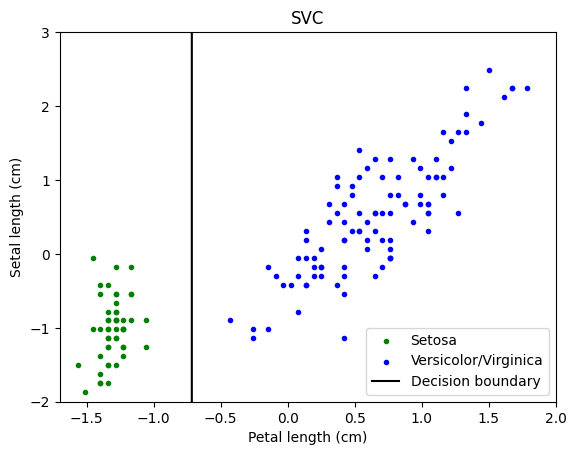

In [ ]:
x = np.array([-1.7, 2])
plt.scatter(X_scaled[y, 0], X_scaled[y, 1], label="Setosa", color="g", marker='.')
plt.scatter(X_scaled[~y, 0], X_scaled[~y, 1], label="Versicolor/Virginica", color="b", marker='.')
plt.plot(x, -(w[0] * x + b)/w[1], label="Decision boundary", color="black")
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Setal length (cm)")
plt.title("SVC")
plt.xlim([-1.7, 2])
plt.ylim([-2, 3])
plt.show()

# Exercise 10

In [46]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn.metrics import accuracy_score

import pandas as pd

In [43]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [48]:
svm_clf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(random_state=42))
])

param_distribs = {"svm_clf__C": uniform(loc=0, scale=10),
                  "svm_clf__kernel": ["linear", "poly", "rbf", "sigmoid"]}

rnd_search = RandomizedSearchCV(svm_clf_pipeline, param_distribs, n_iter=10,
                                scoring="accuracy", cv=3, random_state=42)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm_clf',
                                              SVC(random_state=42))]),
                   param_distributions={'svm_clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78ed50d26320>,
                                        'svm_clf__kernel': ['linear', 'poly',
                                                            'rbf', 'sigmoid']},
                   random_state=42, scoring='accuracy')

In [49]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
display(cv_res.sort_values(by="rank_test_score"))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_clf__C,param_svm_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005219,0.000602,0.002262,0.000223,3.745401,linear,"{'svm_clf__C': 3.745401188473625, 'svm_clf__ke...",1.000000,1.000000,0.977273,0.992424,0.010714,1
2,0.004738,0.000090,0.002142,0.000016,5.986585,rbf,"{'svm_clf__C': 5.986584841970366, 'svm_clf__ke...",1.000000,1.000000,0.977273,0.992424,0.010714,1
3,0.004689,0.000067,0.002103,0.000010,4.458328,rbf,"{'svm_clf__C': 4.458327528535912, 'svm_clf__ke...",1.000000,1.000000,0.977273,0.992424,0.010714,1
5,0.004529,0.000081,0.002039,0.000023,3.337086,sigmoid,"{'svm_clf__C': 3.337086111390218, 'svm_clf__ke...",0.977778,0.977273,0.954545,0.969865,0.010835,4
4,0.004644,0.000059,0.002111,0.000020,0.580836,sigmoid,"{'svm_clf__C': 0.5808361216819946, 'svm_clf__k...",1.000000,0.954545,0.954545,0.969697,0.021427,5
7,0.004695,0.000138,0.002135,0.000038,0.564116,sigmoid,"{'svm_clf__C': 0.5641157902710026, 'svm_clf__k...",1.000000,0.954545,0.954545,0.969697,0.021427,5
6,0.004599,0.000178,0.002012,0.000015,7.080726,poly,"{'svm_clf__C': 7.080725777960454, 'svm_clf__ke...",0.955556,0.931818,0.977273,0.954882,0.018563,7
8,0.005063,0.000808,0.002065,0.000061,8.324426,poly,"{'svm_clf__C': 8.324426408004218, 'svm_clf__ke...",0.955556,0.931818,0.977273,0.954882,0.018563,7
1,0.004720,0.000094,0.002125,0.000049,1.834348,sigmoid,"{'svm_clf__C': 1.834347898661638, 'svm_clf__ke...",0.955556,0.954545,0.931818,0.947306,0.010960,9
9,0.005045,0.000084,0.002258,0.000062,0.007788,sigmoid,"{'svm_clf__C': 0.007787658410143283, 'svm_clf_...",0.400000,0.386364,0.409091,0.398485,0.009340,10


In [50]:
svm_clf_pipeline_best = rnd_search.best_estimator_
svm_clf_pipeline_best.fit(X_train, y_train)

accuracy = accuracy_score(y_test, svm_clf_pipeline_best.predict(X_test))
print(accuracy)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.